# Annotation Budget

In this notebook, we aim to answer the following questions:

1. When you have 5 keypoint annotations per frame is it best to first consolidate the 5 annotations into one "consensus label" and then use that label for supervised training, or is it best to use each annotation separately in training the keypoint detector?
2. If you have a budget of 5000 frame annotations, is it best to collect 5 annotations on 1000 frames, or one annotation for 5000 frames?

We explore these questions for the black mouse on the detection and pose estimation tasks.



In [1]:
import create_new_project
import importlib
importlib.reload(create_new_project)
from create_new_project import *

location = '/home/cristina/Desktop/ericykma/m_dev_fork/'
name = 'annotation_budget_v2'

create_new_project(location, name,
                   download_MARS_checkpoints=True,
                   download_demo_data=False)

Downloading...
From: https://drive.google.com/uc?id=1NyAuwI6iQdMgRB2w4zX44yFAgEkux4op
To: /home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2/MARS_v1_8_models.zip
2.41GB [03:31, 11.4MB/s]
  unzipping...
  models have been downloaded.
Project annotation_budget_v2 created successfully.


In [3]:
import pose_annotation_tools.annotation_postprocessing
import importlib
importlib.reload(pose_annotation_tools.annotation_postprocessing)
from pose_annotation_tools.annotation_postprocessing import *

project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2'
annotation_postprocessing(project_path)

Hello world
START MANIFEST_TO_DICT
CONFIG FILE OPENED
CONFIG FILE PROCESSED
OPENING MANIFEST FILE
Line 0
Line 1000
Line 2000
Line 3000
Line 4000
Line 5000
Line 6000
Line 7000
Line 8000
Line 9000
Line 10000
Line 11000
Line 12000
Line 13000
Line 14000
PROCESSED MANIFEST FILE
FINAL CHECKPOINT BEFORE LOOP
Processing manifest file...
15000
 line 0
 line 500
 line 1000
  frame 1000
 line 1500
 line 2000
  frame 2000
 line 2500
 line 3000
  frame 3000
 line 3500
 line 4000
  frame 4000
 line 4500
 line 5000
  frame 5000
 line 5500
 line 6000
  frame 6000
 line 6500
 line 7000
  frame 7000
 line 7500
 line 8000
  frame 8000
 line 8500
 line 9000
  frame 9000
 line 9500
 line 10000
  frame 10000
 line 10500
 line 11000
  frame 11000
 line 11500
 line 12000
  frame 12000
 line 12500
 line 13000
  frame 13000
 line 13500
 line 14000
  frame 14000
 line 14500
Ground-truth keypoint locations extracted!
Finished making .json
Generating black_top detection training files...
<class 'list'>
<class 'dic

tab:blue
tab:orange
tab:green
tab:red
tab:brown
tab:pink
tab:olive
tab:blue
tab:orange
tab:green
tab:red
tab:brown
tab:pink
tab:olive


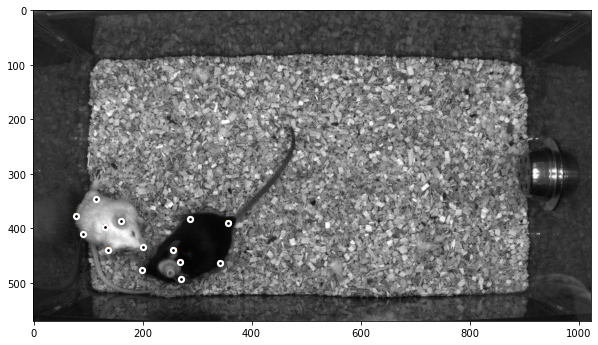

In [5]:
import pose_annotation_tools.evaluation
import importlib
importlib.reload(pose_annotation_tools.evaluation)
from pose_annotation_tools.evaluation import *

frame_num = 10  # the frame number to look at in your data

plot_frame(project_path,frame_num, markersize=5, figsize=[10,10])

In [1]:
from multibox_detection import train_detect
import importlib
importlib.reload(train_detect)

project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2'
train_detect.run_training(project_path, max_training_steps=10000)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

/home/cristina/Desktop/ericykma/m_dev_fork/MARS_Developer/multibox_detection/train_detect.py:402: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bbox_priors = np.array(bbox_priors).astype(np.float32)



100

INFO:tensorflow:Ignoring --pretrained_model_path because a checkpoint already exists in /home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2/detection/black_top_log
INFO:tensorflow:Restoring parame

KeyboardInterrupt: 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



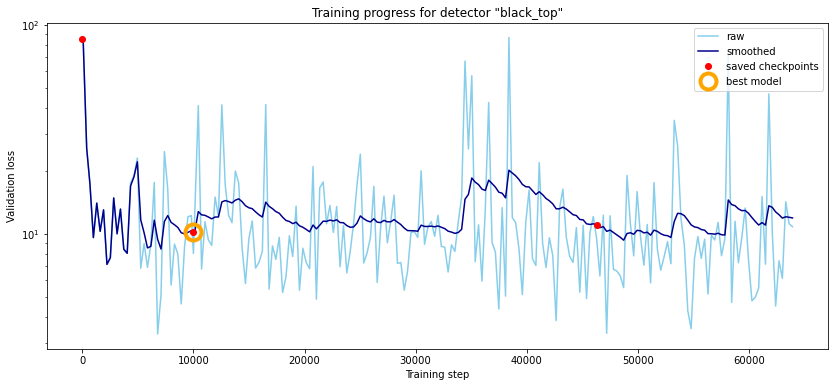

Saved best-performing checkpoint for model "black_top."


In [1]:
from multibox_detection import evaluate_detection
import importlib
importlib.reload(evaluate_detection)

project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2'
evaluate_detection.plot_training_progress(project_path, omitFirst=0, logTime=False)
evaluate_detection.save_best_checkpoint(project_path)

In [2]:
from multibox_detection import evaluate_detection

project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2'
performance = evaluate_detection.run_test(project_path)

detecting using black_top
/home/cristina/Desktop/ericykma/m_dev_fork/MARS_Developer/multibox_detection/evaluate_detection.py:545: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bbox_priors = np.array(bbox_priors).astype(np.float32)
/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2/detection/black_top_model
is now:/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2/detection/black_top_model/model.ckpt-10000
INFO:tensorflow:Restoring parameters from /home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2/detection/black_top_model/model.ckpt-10000
Found model for global step: 10000


Sample frame for black_top detector:
[{'image_id': 789, 'bbox': [0.45375654101371765, 0.25254058837890625, 0.23125025629997253, 0.30718058347702026], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id': 789, 'bbox': [0.8287565112113953, 0.002540603280067444, 0.17124348878860474, 0.3071805387735367], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id': 789, 'bbox': [0.45375654101371765, 0.002540603280067444, 0.23125025629997253, 0.3071805387735367], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id': 789, 'bbox': [0.5787565112113953, 0.0, 0.23125028610229492, 0.18472114205360413], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id': 789, 'bbox': [0.5787565112113953, 0.002540603280067444, 0.23125028610229492, 0.3071805387735367], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id': 789, 'bbox': [0.7037565112113953, 0.25254058837890625, 0.23125028610229492, 0.30718058347702026], 'score': 0.020898282527923584, 'category_id': 1}, {'image_id

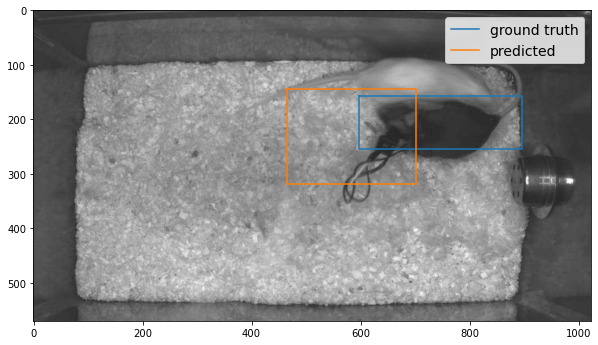

In [3]:
from multibox_detection import evaluate_detection
import importlib
importlib.reload(evaluate_detection)
project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/annotation_budget_v2'
frame_num = 789

evaluate_detection.plot_frame(project_path, frame_num, markersize=7, figsize=[10,10], confidence_thr=0.2)

In [4]:
performance = evaluate_detection.coco_eval(project_path)

for model in performance.keys():
    print('Performance for ' + model + ':')
    performance[model].summarize()

Performance for black_top:
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.422


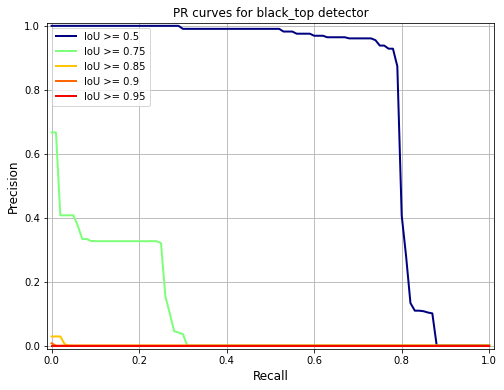

In [5]:
from multibox_detection import evaluate_detection

project_path = '/home/cristina/Desktop/ericykma/m_dev_fork/example_project'
evaluate_detection.pr_curve(project_path)